Create our model

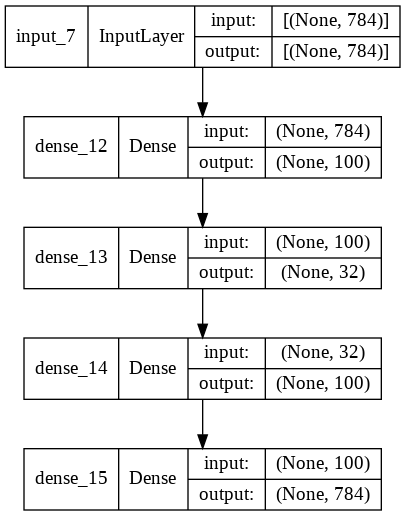

In [ ]:
import keras
from keras import layers
from keras.utils.vis_utils import plot_model


# This is the size of our encoded representations
encoding_dim = 32  # 32 Latent space

# This is our input image
input_img = keras.Input(shape=(784,))

x1=layers.Dense(100,activation='relu')(input_img)
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(x1)

x2=layers.Dense(100,activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(x2)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)
plot_model(autoencoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
encoder = keras.Model(input_img, encoded)

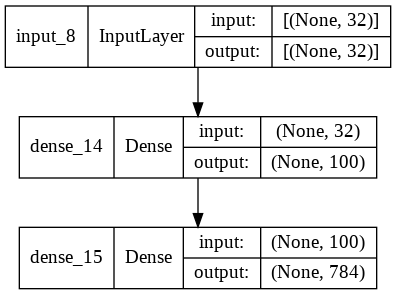

In [ ]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-2](encoded_input)
decoder_layer = autoencoder.layers[-1](decoder_layer)

# Create the decoder model
#decoder = keras.Model(encoded_input, decoder_layer(encoded_input))################

decoder = keras.Model(encoded_input, decoder_layer)
plot_model(decoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


Download Dataset

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 7ms/step - loss: 0.2451 - val_loss: 0.1617
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1447 - val_loss: 0.1286
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1226 - val_loss: 0.1149
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1125 - val_loss: 0.1075
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1066 - val_loss: 0.1028
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1029 - val_loss: 0.1000
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1005 - val_loss: 0.0979
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0986 - val_loss: 0.0965
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0972 - val_loss: 0.0954
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0961 - val_loss: 0.0949

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

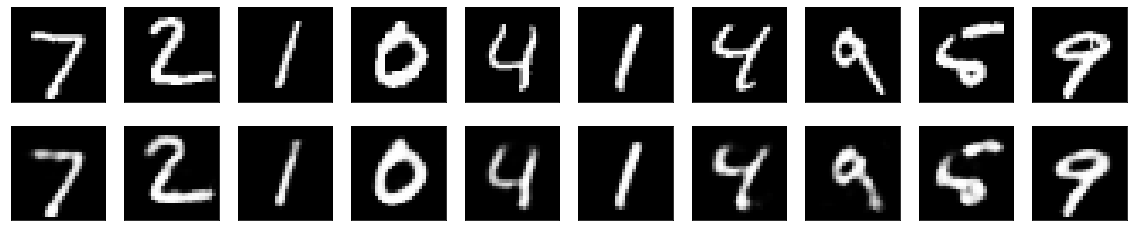

In [ ]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()